In [1]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# Date: April 2025
# License: MIT

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Beta-Binomial Conjugate

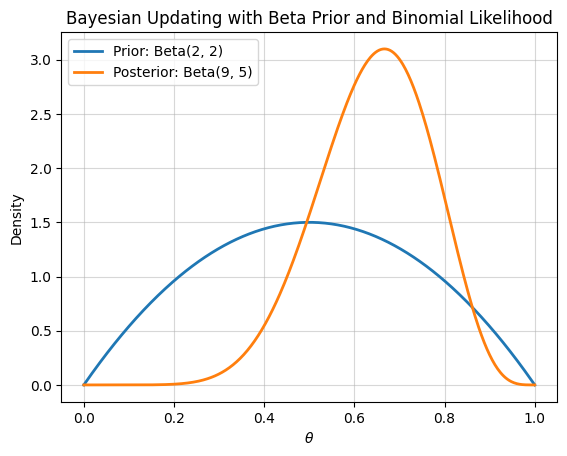

In [3]:
from scipy.stats import beta

# Parameters
alpha_prior, beta_prior = 2, 2      # Prior Beta(2, 2)
n, x = 10, 7                        # Observed data: 7 successes out of 10 trials
alpha_post = alpha_prior + x
beta_post = beta_prior + n - x

# θ values
theta = np.linspace(0, 1, 500)

# Beta PDFs
prior_pdf = beta.pdf(theta, alpha_prior, beta_prior)
posterior_pdf = beta.pdf(theta, alpha_post, beta_post)

# Plot
plt.plot(theta, prior_pdf, label=r"Prior: Beta(2, 2)", linewidth=2)
plt.plot(theta, posterior_pdf, label=fr"Posterior: Beta({alpha_post}, {beta_post})", linewidth=2)
plt.title("Bayesian Updating with Beta Prior and Binomial Likelihood")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.5)
plt.savefig('figures/beta_binomial_conjugate.pdf')

Normal-Normal Conjugate

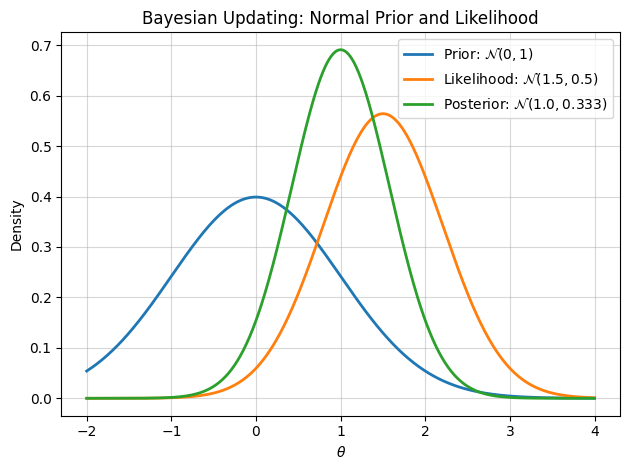

In [4]:
from scipy.stats import norm

# Parameters
mu_0 = 0      # Prior mean
tau2 = 1      # Prior variance
sigma2 = 0.5  # Likelihood variance (known)
x_obs = 1.5   # Observed data

# Compute posterior parameters
tau_n2 = 1 / (1 / tau2 + 1 / sigma2)
mu_n = tau_n2 * (mu_0 / tau2 + x_obs / sigma2)

# Plotting range for theta
theta = np.linspace(-2, 4, 500)

# Prior, likelihood (re-centered), and posterior densities
prior_pdf = norm.pdf(theta, loc=mu_0, scale=np.sqrt(tau2))
likelihood_pdf = norm.pdf(theta, loc=x_obs, scale=np.sqrt(sigma2))
posterior_pdf = norm.pdf(theta, loc=mu_n, scale=np.sqrt(tau_n2))

# Plot
plt.plot(theta, prior_pdf, label="Prior: $\\mathcal{N}(0, 1)$", linewidth=2)
plt.plot(theta, likelihood_pdf, label="Likelihood: $\\mathcal{N}(1.5, 0.5)$", linewidth=2)
plt.plot(theta, posterior_pdf, label=f"Posterior: $\\mathcal{{N}}({mu_n}, {tau_n2:.3f})$", linewidth=2)

plt.title("Bayesian Updating: Normal Prior and Likelihood")
plt.xlabel(r"$\theta$")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig('figures/normal_normal_conjugate.pdf')